In [231]:
import cv2
import numpy as np
from common_functions import *
from skimage.filters import threshold_minimum,threshold_otsu
from skimage.exposure import equalize_hist
from scipy.ndimage import binary_erosion,binary_closing,binary_opening,binary_dilation


In [232]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def kmeans(image_rgb,k,randomSeed = 42):
    cv2.setRNGSeed(randomSeed)

    # Reshape the image into a 2D array of pixels and 3 color values (RGB)
    pixel_values = image_rgb.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Define criteria, number of clusters (K), and apply K-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    #k = 2  # Number of clusters
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert centers to uint8 (RGB values)
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image_rgb.shape)

    # Create a mask for the cluster corresponding to the statue
    l = labels.copy()
    labels = labels.flatten()
    mask = (labels == 0)  # Adjust based on which cluster corresponds to the statue
    segmented_mask = mask.reshape(image_rgb.shape[:2])

    # Apply mask to the original image
    statue_segmented = cv2.bitwise_and(image_rgb, image_rgb, mask=segmented_mask.astype(np.uint8))

    return labels,centers



In [233]:
# Load the image
image = cv2.imread('../imgs/7.jpg')
k = 2
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
labels,centers = kmeans(image_rgb,k)
list = []


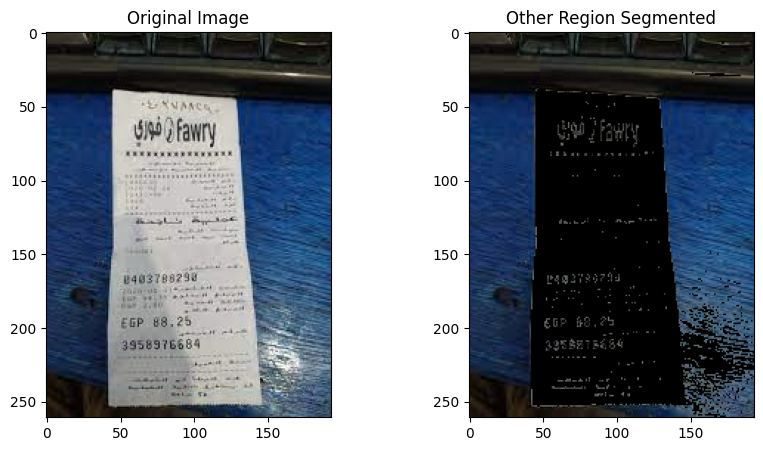

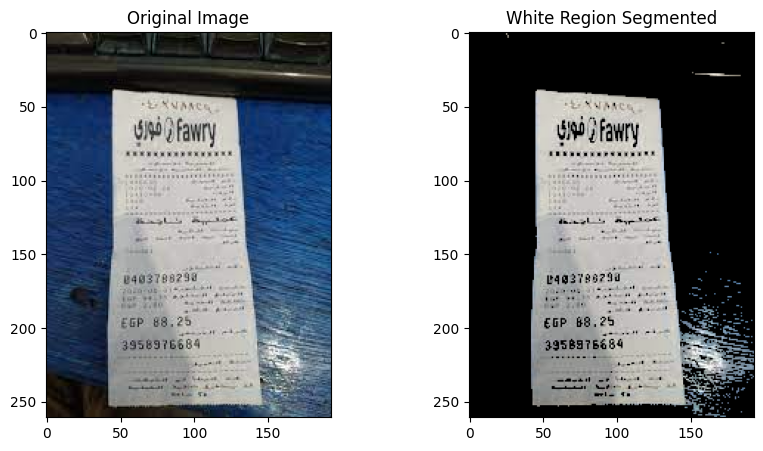

In [234]:
white_label = np.argmax(np.sum(centers, axis=1))  # Identify the white region

for i in range(2):
    mask = (labels == i)
    segmented_mask = mask.reshape(image_rgb.shape[:2])

    # Apply mask to the original image
    segmented_image = cv2.bitwise_and(image_rgb, image_rgb, mask=segmented_mask.astype(np.uint8))

    # Display results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 2, 2)
    if i == white_label:
        plt.title("White Region Segmented")
    else:
        plt.title("Other Region Segmented")
    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))

    plt.show()


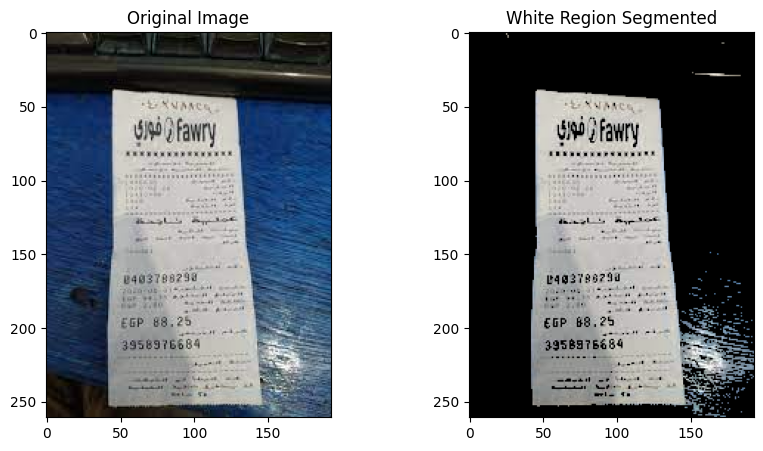

In [235]:
mask = (labels == white_label)
segmented_mask = mask.reshape(image_rgb.shape[:2])

# Apply mask to the original image
segmented_image = cv2.bitwise_and(image_rgb, image_rgb, mask=segmented_mask.astype(np.uint8))

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
if i == white_label:
    plt.title("White Region Segmented")
else:
    plt.title("Other Region Segmented")
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))

plt.show()

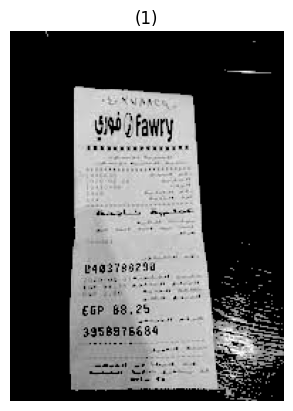

In [236]:
segmentedImageRgb = rgb2gray(segmented_image)
show_images([segmentedImageRgb])

In [237]:
print(segmentedImageRgb.max())

1.0


In [238]:
segmentedImageRgb = (segmentedImageRgb * 255).astype('uint8')

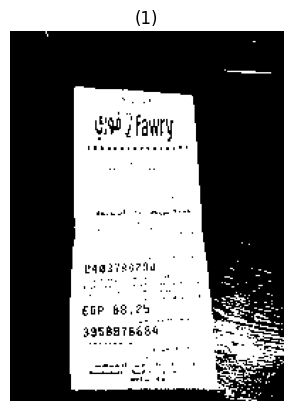

In [239]:
threshold = threshold_minimum(segmentedImageRgb) #first problem
#threshold = threshold_otsu(segmentedImageRgb) #second problem
mask = segmentedImageRgb > threshold
binarySeg = np.zeros(segmentedImageRgb.shape)
binarySeg[mask] = 255
show_images([binarySeg])

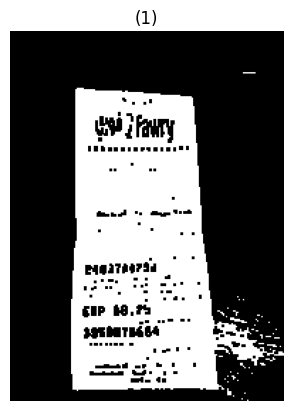

In [ ]:
se = np.ones([3,3])
opened = binary_erosion(binarySeg,se, iterations=10) #problem 2
show_images([opened])


In [241]:
from skimage.measure import find_contours

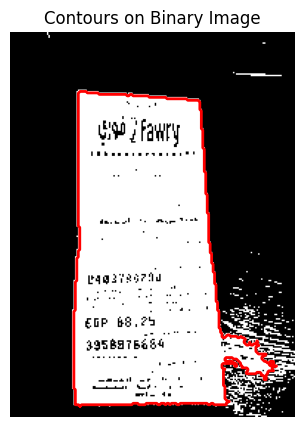

In [242]:
contours = find_contours(opened,0.8)
import matplotlib.pyplot as plt


# Plot the binary image with contours
plt.figure(figsize=(10, 5))
plt.imshow(binarySeg.astype(bool), cmap='gray')  # Display the binary image
plt.title("Contours on Binary Image")
plt.axis("off")


# Plot each contour
maxC = max(contours, key=len)
c = maxC

plt.plot(c[:, 1], c[:, 0], linewidth=2, color='red')  # Contours are in (y, x) format

plt.show()

In [243]:
print(binarySeg.shape)

(261, 193)


In [244]:
xMax = c[:,0].max()
yMax = c[:,1].max()